In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
%matplotlib inline

In [ ]:
customers = pd.read_csv('Ecommerce Customers.csv')
customers.head()

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


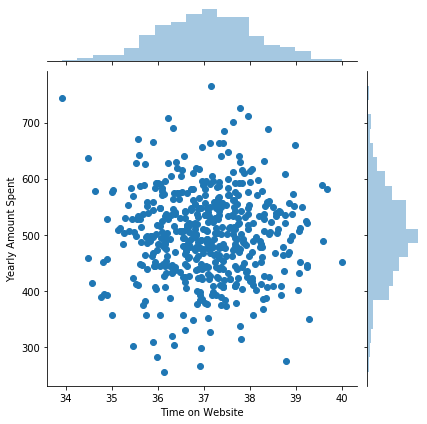

In [9]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

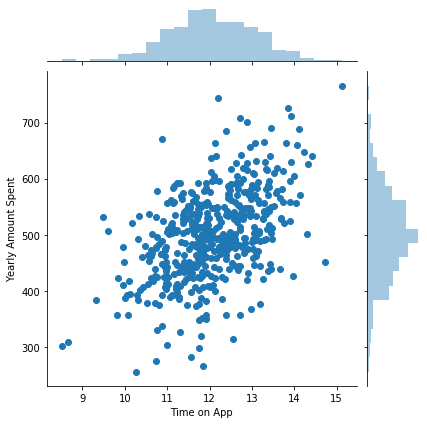

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

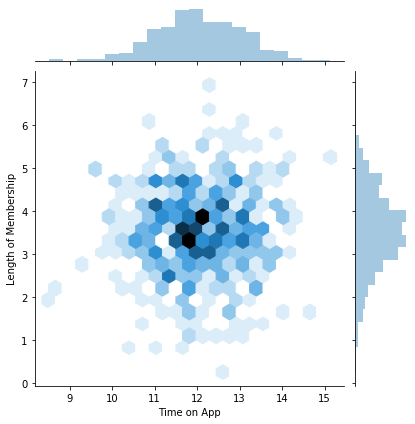

In [16]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

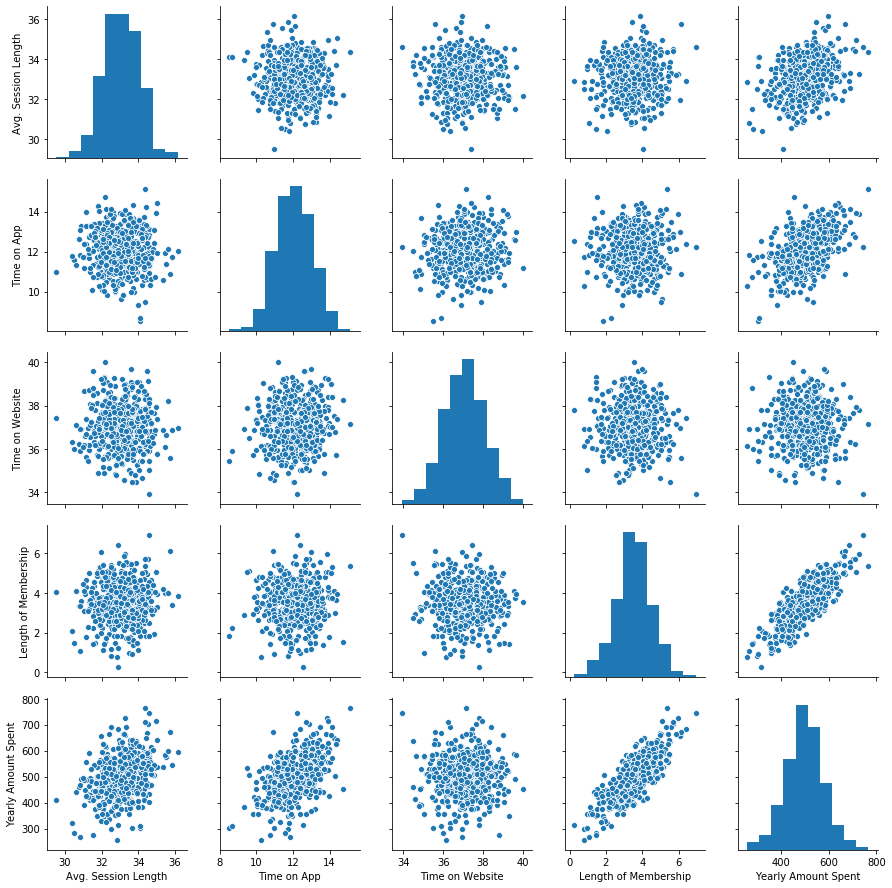

In [17]:
sns.pairplot(data=customers)

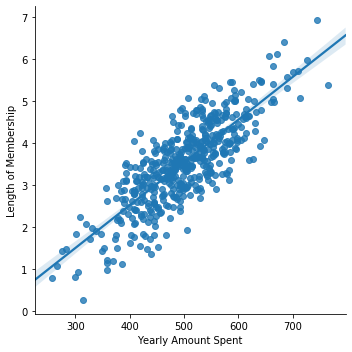

In [19]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

In [22]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] 

In [24]:
y = customers['Yearly Amount Spent']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression 

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [37]:
predictions = lm.predict(X=X_test)

Text(0, 0.5, 'Predicted Y')

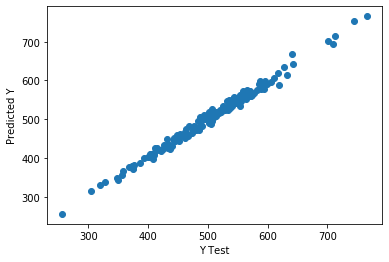

In [41]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn import metrics

In [51]:
print(f'MAE: {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE : {metrics.mean_squared_error(y_test,predictions)}')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.2281486534308295
MSE : 79.8130516509743
RMSE: 8.933815066978626


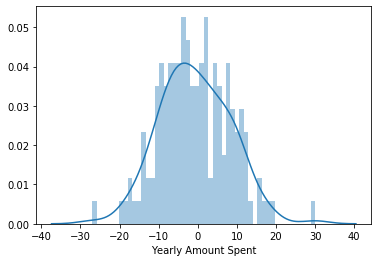

In [53]:
sns.distplot((y_test-predictions),bins=50)

In [55]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
